<a href="https://colab.research.google.com/github/SSSpock/skillspire/blob/main/ml_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lesson 1: Introduction to Feature Engineering and Model Performance Assessment

Welcome to the first lesson of this week's data science bootcamp! In this lesson, we will cover the basics of feature engineering and model performance assessment. We'll also introduce you to the XGBoost model, which we will use throughout this week's lessons.

Feature engineering is a critical step in the machine learning pipeline. It involves transforming raw data into features that better represent the underlying problem and improve the performance of machine learning models. Model performance assessment is necessary to evaluate the effectiveness of our models and make informed decisions about how to improve them.

Welcome to the first lesson of this week's data science bootcamp! In this lesson, we will cover the basics of feature engineering and model performance assessment. We'll also introduce you to the XGBoost model, which we will use throughout this week's lessons.

Feature engineering is a critical step in the machine learning pipeline. It involves transforming raw data into features that better represent the underlying problem and improve the performance of machine learning models. Model performance assessment is necessary to evaluate the effectiveness of our models and make informed decisions about how to improve them.

Dataset Introduction
For this week's lessons, we will use the "House Prices: Advanced Regression Techniques" dataset from Kaggle. This dataset contains 79 features describing various aspects of residential homes in Ames, Iowa. Our goal is to predict the final sale price of each house using these features.

You can download the dataset [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).


Throughout the lessons, we will apply various feature engineering techniques and assess the performance of our XGBoost model on this dataset. In the next sections, we will dive deeper into the concepts of feature engineering and model performance assessment.

## Introduction to Feature Engineering
Importance of Feature Engineering
Feature engineering is an essential step in the machine learning pipeline. It helps in:

**Improving the performance of machine learning models**
* Reducing overfitting
* Enhancing model interpretability
* Reducing the computational cost of training models

 
**Common Feature Engineering Techniques **
* Feature Scaling and Transformation
* Handling Missing Values
* Handling Categorical Variables
* Feature Interaction and Polynomial Features
* Dimensionality Reduction



## Exploratory Data Analysis (EDA) and Feature Selection
**Correlation Analysis**
Correlation analysis helps identify the relationships between features in the dataset. Strongly correlated features can be removed or combined to reduce the dimensionality of the dataset, simplifying the model.


**Feature Importance using Decision Trees**
Feature importance can be computed using tree-based algorithms such as Decision Trees, Random Forests, or XGBoost. These models calculate the importance of each feature based on how much they contribute to improving the model's prediction accuracy.

## Feature Scaling and Transformation
**Standard Scaling**
Standard scaling, also known as Z-score normalization, scales the features to have a mean of 0 and a standard deviation of 1. This transformation is useful for algorithms that are sensitive to the scale of input features, such as linear regression or support vector machines.

**Min-Max Scaling**
Min-Max scaling scales the features to a specific range, typically [0, 1]. It is useful when the distribution of the data is not Gaussian, or when the minimum and maximum values of a feature are known.

**Log Transformation**
Log transformation is a technique used to stabilize variance, normalize the data, and reduce the effects of outliers. It is especially useful when dealing with data that has a skewed distribution.

**Power Transformation**
Power transformations, such as the Box-Cox or Yeo-Johnson methods, are used to stabilize variance, normalize data, and make data more Gaussian-like. These transformations are more flexible than log transformation, as they can handle zero and negative values.

## Model Performance Assessment
**Confusion Matrix**
A confusion matrix is a table that compares the actual and predicted classes for a classification problem. It is used to calculate various performance metrics like accuracy, precision, recall, and F1-score.

**Precision, Recall, and F1-Score**
Precision, recall, and F1-score are metrics used to evaluate the performance of classification models. Precision measures the proportion of true positive predictions among all positive predictions, recall measures the proportion of true positive predictions among all actual positive instances, and the F1-score is the harmonic mean of precision and recall.

**ROC Curve and AUC**
The ROC curve (Receiver Operating Characteristic) plots the true positive rate (recall) against the false positive rate for different classification thresholds. AUC (Area Under the Curve) is a single value summarizing the performance of the classifier. A higher AUC indicates better classifier performance.

**Cross-Validation**
Cross-validation is a technique used to evaluate the performance of machine learning models by dividing the dataset into multiple folds and assessing the model on each fold. This method helps to reduce overfitting and provides a more accurate estimation of the model's performance on unseen data.

## Coding Examples

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline


In [3]:
# Load the dataset
train = pd.read_csv('https://raw.githubusercontent.com/SSSpock/skillspire/main/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/SSSpock/skillspire/main/train.csv')

# Explore the dataset
train.head()
train.describe()
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<ipython-input-5-3e4533c6fbeb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


<Axes: >

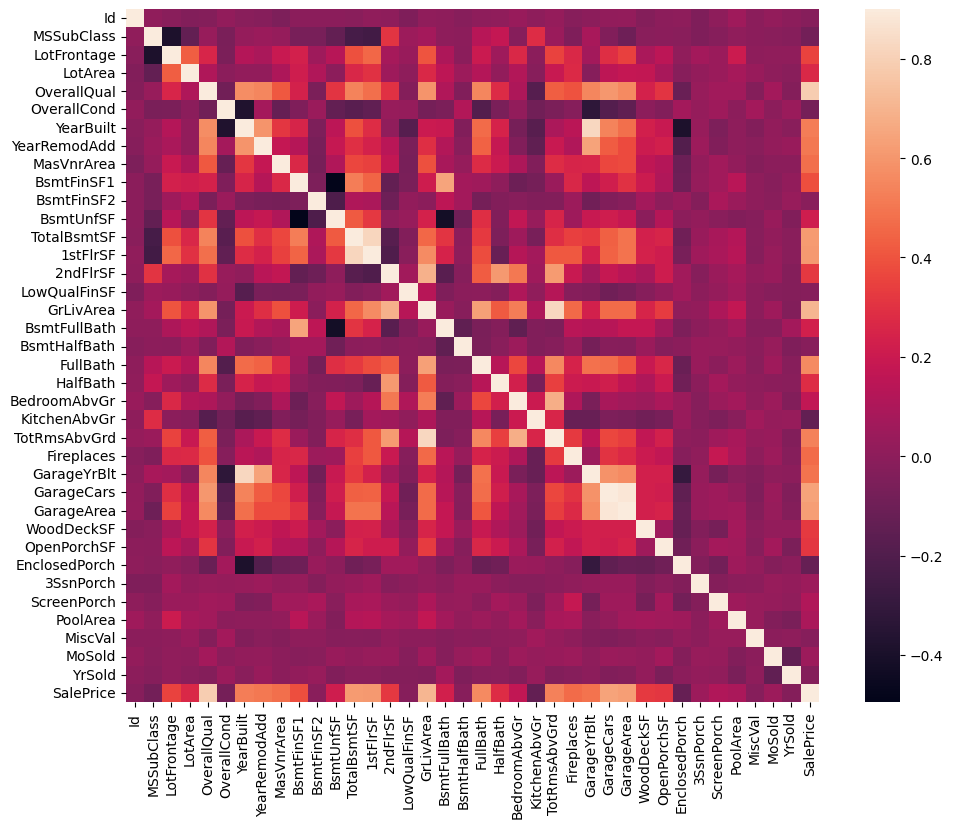

In [ ]:
# Correlation heatmap
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


In [5]:
# Prepare the data
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

# One-hot encode the categorical variables
X_encoded = pd.get_dummies(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

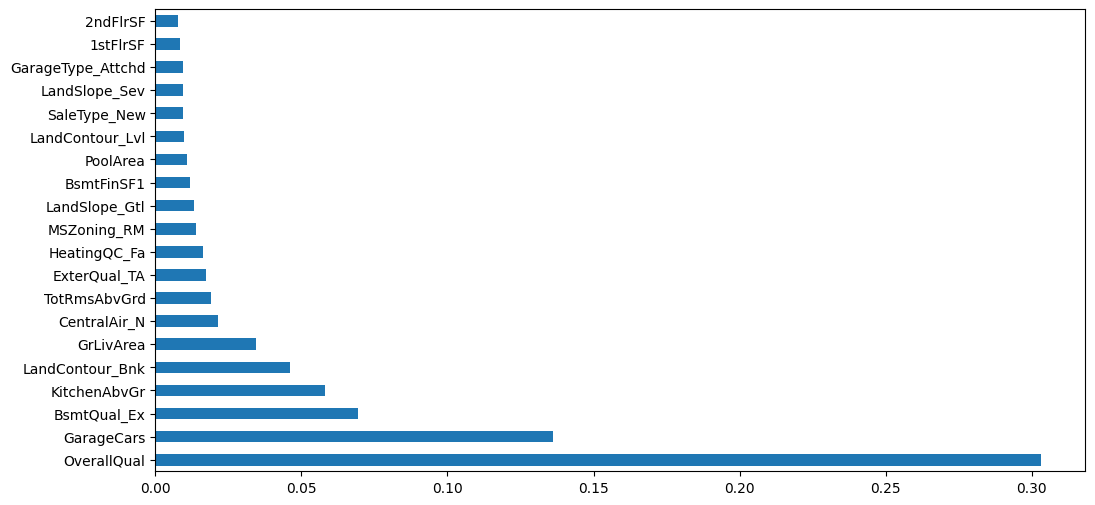

In [6]:
# Train an XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Plot feature importances
plt.figure(figsize=(12, 6))
feat_importances = pd.Series(xgb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [ ]:
X_train[feat_importances.nlargest(20).index]

,OverallQual,GarageCars,BsmtQual_Ex,KitchenAbvGr,LandContour_Bnk,GrLivArea,CentralAir_N,TotRmsAbvGrd,ExterQual_TA,HeatingQC_Fa,MSZoning_RM,LandSlope_Gtl,BsmtFinSF1,PoolArea,LandContour_Lvl,SaleType_New,LandSlope_Sev,GarageType_Attchd,1stFlrSF,2ndFlrSF
254,5,1,0,1,0,1314,0,5,1,0,0,1,922,0,1,0,0,1,1314,0
1066,6,2,0,1,0,1571,0,7,0,0,0,1,0,0,1,0,0,1,799,772
638,5,0,0,1,0,796,0,4,1,0,0,1,0,0,1,0,0,0,796,0
799,5,1,0,1,0,1768,0,7,1,0,0,1,569,0,1,0,0,0,981,787
380,5,1,0,1,0,1691,0,6,1,0,0,1,218,0,1,0,0,0,1026,665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,6,2,0,1,0,1314,0,6,0,0,0,1,24,0,1,0,0,1,1314,0
1130,4,2,0,1,0,1981,0,7,1,0,0,1,622,0,1,0,0,0,1328,653
1294,5,2,0,1,0,864,0,5,1,0,0,1,167,0,1,0,0,0,864,0
860,7,1,0,1,0,1426,0,7,0,0,0,1,0,0,1,0,0,0,912,514


In [7]:
# Standard scaling
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [8]:
# Min-Max scaling
scaler = MinMaxScaler()
X_train_mm = scaler.fit_transform(X_train)
X_test_mm = scaler.transform(X_test)


In [9]:
# Train an XGBoost model
xgb = XGBRegressor()
xgb.fit(X_train_std, y_train)

# Predictions
y_pred = xgb.predict(X_test_std)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")


Mean Squared Error: 867190334.8427968
Mean Absolute Error: 17011.535009096748
R2 Score: 0.886942183237235


In [10]:
# Cross-validation
xgb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', XGBRegressor())
])

cv_scores = cross_val_score(xgb_pipeline, X_encoded, y, cv=5, scoring='r2')

print(f"Cross-validation R2 scores: {cv_scores}")
print(f"Mean R2 score: {np.mean(cv_scores)}")


Cross-validation R2 scores: [0.89778209 0.83497966 0.85129979 0.8939537  0.86812188]
Mean R2 score: 0.86922742366609


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

# Perform a grid search
grid_search = GridSearchCV(xgb_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_encoded, y)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Evaluate the best model
best_model = grid_search.best_estimator_
cv_scores_best = cross_val_score(best_model, X_encoded, y, cv=5, scoring='r2')

print(f"Cross-validation R2 scores (best model): {cv_scores_best}")
print(f"Mean R2 score (best model): {np.mean(cv_scores_best)}")


Best hyperparameters: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 300}
Cross-validation R2 scores (best model): [0.90442141 0.85122987 0.89917797 0.86874483 0.89187542]
Mean R2 score (best model): 0.8830898988793494


In [ ]:
# Train the optimized XGBoost model
optimized_xgb = XGBRegressor(
    n_estimators=best_params['model__n_estimators'],
    learning_rate=best_params['model__learning_rate'],
    max_depth=best_params['model__max_depth']
)

xgb_pipeline_optimized = Pipeline([
    ('scaler', StandardScaler()),
    ('model', optimized_xgb)
])

xgb_pipeline_optimized.fit(X_train, y_train)

# Predictions
y_pred_optimized = xgb_pipeline_optimized.predict(X_test)

# Evaluate the optimized model performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Mean Squared Error (optimized model): {mse_optimized}")
print(f"Mean Absolute Error (optimized model): {mae_optimized}")
print(f"R2 Score (optimized model): {r2_optimized}")


Mean Squared Error (optimized model): 915444757.7894503
Mean Absolute Error (optimized model): 16646.069483090752
R2 Score (optimized model): 0.8806511309868836


Questions to Test Students' Understanding
Why is feature engineering important in machine learning?

* Explain the difference between label encoding and one-hot encoding. When should you use each method?

* How can you use feature scaling to improve model performance? Name and describe two common scaling methods.

* What is the role of hyperparameter tuning in improving model performance?

* What is cross-validation, and why is it important in model assessment?

* What are the advantages of using ensemble methods like XGBoost over simpler models like linear regression?

* How can you use feature importance from an XGBoost model to guide feature selection?

* Describe the steps you would take to perform a comprehensive feature engineering process on a new dataset.

* Explain how to use regularization to prevent overfitting in your model.

* What are some common techniques for feature transformation, and how do they help improve model performance?

# Feature Engineering: Creating New Features

We'll create new features by combining existing predictors to see if these engineered features provide more information and improve our model performance.

* Average room size on the 1st floor: Divide the 1st floor square feet (1stFlrSF) by the total number of rooms above ground (TotRmsAbvGrd).

* Average room size on the 2nd floor: Divide the 2nd floor square feet (2ndFlrSF) by the total number of rooms above ground (TotRmsAbvGrd).

* Total living area: Add the total basement square feet (TotalBsmtSF), 1st floor square feet (1stFlrSF), and 2nd floor square feet (2ndFlrSF).

In [12]:
# Create new features
X_encoded['AvgRoomSize_1stFlr'] = X_encoded['1stFlrSF'] / X_encoded['TotRmsAbvGrd']
X_encoded['AvgRoomSize_2ndFlr'] = X_encoded['2ndFlrSF'] / X_encoded['TotRmsAbvGrd']
X_encoded['TotalLivingArea'] = X_encoded['TotalBsmtSF'] + X_encoded['1stFlrSF'] + X_encoded['2ndFlrSF']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


## Retrain the Model with Cross-Validation

Now we'll retrain the model using cross-validation and compare the performance with the previous model.

In [13]:
# Cross-validation
cv_scores_new_features = cross_val_score(xgb_pipeline, X_encoded, y, cv=5, scoring='r2')

print(f"Cross-validation R2 scores (new features): {cv_scores_new_features}")
print(f"Mean R2 score (new features): {np.mean(cv_scores_new_features)}")


Cross-validation R2 scores (new features): [0.88843225 0.85959411 0.85201535 0.86643021 0.87639175]
Mean R2 score (new features): 0.868572735369827


## Section 2: Handling Categorical Variables

Categorical variables are those that represent a fixed number of categories or groups.

They are not numerical but can still hold valuable information for your machine learning models. 

In this section, we'll explore three popular techniques for handling categorical variables: Label Encoding, One-Hot Encoding, and Target Encoding.

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample data
data = {'Category': ['A', 'B', 'A', 'C', 'B']}
df = pd.DataFrame(data)

# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit and transform the categorical data
df['Encoded'] = encoder.fit_transform(df['Category'])
print(df)


  Category  Encoded
0        A        0
1        B        1
2        A        0
3        C        2
4        B        1


## 2.2. One-Hot Encoding

Theory:

One-Hot Encoding is another technique used to handle nominal categorical variables. It creates binary features (0 or 1) for each category, resulting in one new column per category. 

This approach eliminates any false sense of order introduced by Label Encoding, but it can lead to a significant increase in the number of features, especially when dealing with high-cardinality categorical variables.

In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample data
data = {'Category': ['A', 'B', 'A', 'C', 'B']}
df = pd.DataFrame(data)

# Create a OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(df[['Category']]).toarray()
encoded_columns = encoder.get_feature_names_out(['Category'])

# Add the new one-hot encoded features to the DataFrame
df_encoded = pd.DataFrame(encoded_data, columns=encoded_columns)
df = pd.concat([df, df_encoded], axis=1)
print(df)


  Category  Category_A  Category_B  Category_C
0        A         1.0         0.0         0.0
1        B         0.0         1.0         0.0
2        A         1.0         0.0         0.0
3        C         0.0         0.0         1.0
4        B         0.0         1.0         0.0


## 2.3. Target Encoding

Theory:

Target Encoding, also known as mean encoding, is a technique used to encode categorical variables based on the mean of the target variable for each category. 

This approach can be particularly useful when dealing with high-cardinality categorical variables, as it does not significantly increase the number of features like One-Hot Encoding.

However, Target Encoding can introduce leakage if not done correctly. To prevent leakage, it's essential to perform target encoding separately for the training and validation/test sets.

In [18]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.4 MB/s eta 0:00:00


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

# Sample data
data = {'Category': ['A', 'B', 'A', 'C', 'B'], 'Target': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Create a TargetEncoder object
encoder = TargetEncoder()

# Fit the encoder on the training data
encoder.fit(train_df[['Category']], train_df['Target'])

# Transform the categorical data
train_df['Encoded'] = encoder.transform(train_df[['Category']])
val_df['Encoded'] = encoder.transform(val_df[['Category']])

print("Training data:")
print(train_df)
print("\nValidation data:")
print(val_df)

Training data:
  Category  Target   Encoded
4        B       1  0.782527
2        A       1  0.785463
0        A       1  0.785463
3        C       0  0.652419

Validation data:
  Category  Target   Encoded
1        B       0  0.782527


# Feature Interaction and Polynomial Features

Feature interaction refers to the combination of two or more features to create new features that can potentially improve the performance of a machine learning model. 

Polynomial features, in particular, are a type of feature interaction that creates new features as a combination of existing features raised to different powers.

### Theory
Polynomial features can help capture the relationships between features and the target variable that are not linear. For example, if there's a quadratic or cubic relationship between a feature and the target variable, adding polynomial features can help the model capture this relationship.

However, creating polynomial features can significantly increase the number of features in your dataset, leading to increased complexity and potential overfitting. 

It's essential to carefully select the degree of the polynomial and use techniques like regularization and dimensionality reduction to mitigate overfitting.

In [21]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Sample data
data = {'Feature1': [1, 2, 3, 4, 5], 'Feature2': [2, 3, 4, 5, 6]}
df = pd.DataFrame(data)

# Create a PolynomialFeatures object with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the data
polynomial_features = poly.fit_transform(df)

# Add the new polynomial features to the DataFrame
df_poly = pd.DataFrame(polynomial_features, columns=poly.get_feature_names_out(df.columns))
print(df_poly)


   Feature1  Feature2  Feature1^2  Feature1 Feature2  Feature2^2
0       1.0       2.0         1.0                2.0         4.0
1       2.0       3.0         4.0                6.0         9.0
2       3.0       4.0         9.0               12.0        16.0
3       4.0       5.0        16.0               20.0        25.0
4       5.0       6.0        25.0               30.0        36.0


## Handling Missing Values

Missing values are a common issue in real-world datasets. They can occur for various reasons, such as data entry errors, sensor malfunctions, or incomplete information. 

Handling missing values is essential, as most machine learning algorithms do not accept datasets with missing values. 

In this section, we'll discuss imputation techniques and dealing with outliers.

## Imputation Techniques

**Theory:**

Imputation refers to the process of replacing missing values with estimated values. There are several imputation techniques, each with its own advantages and disadvantages. Some common techniques include:

* Mean or median imputation: 
Replace missing values with the mean or median of the available data for that feature. This approach is simple and can work well for datasets with a small number of missing values. However, it may not be ideal for datasets with a large number of missing values, as it can distort the distribution of the data.

* Mode imputation: 
Replace missing values with the mode (most frequent value) of the available data for that feature. This approach is suitable for categorical variables.

* K-Nearest Neighbors (KNN) imputation: 
Replace missing values with the mean or median of the K-nearest neighbors in the feature space. This approach can be more accurate than mean or median imputation but is computationally more expensive.

* Model-based imputation: Train a machine learning model (e.g., linear regression, decision tree) to predict the missing values based on the other available features. This approach can be highly accurate but is also computationally expensive and can be prone to overfitting.

In [22]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Sample data
data = {'Feature1': [1, 2, 3, None, 5], 'Feature2': [2, 3, None, 5, 6]}
df = pd.DataFrame(data)

# Create a SimpleImputer object for mean imputation
mean_imputer = SimpleImputer(strategy='mean')

# Fit and transform the data
df_mean_imputed = mean_imputer.fit_transform(df)
df_mean_imputed = pd.DataFrame(df_mean_imputed, columns=df.columns)
print("Mean imputed data:")
print(df_mean_imputed)


Mean imputed data:
   Feature1  Feature2
0      1.00       2.0
1      2.00       3.0
2      3.00       4.0
3      2.75       5.0
4      5.00       6.0


## Dealing with Outliers

**Theory:**

Outliers are data points that are significantly different from the rest of the data. They can occur for various reasons, such as data entry errors, sensor malfunctions, or genuine extreme values. Outliers can have a significant impact on the performance of machine learning models, particularly those that are sensitive to extreme values (e.g., linear regression, support vector machines).

There are several techniques to detect and handle outliers, including:

* Visualization: Use plots like box plots, scatter plots, or histograms to visually identify potential outliers.

* Z-score: Calculate the Z-score for each data point, which measures how many standard deviations it is from the mean. Data points with a high absolute Z-score (e.g., > 3) can be considered outliers.

* IQR method: Calculate the interquartile range (IQR) for each feature, which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). Data points that fall below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR can be considered outliers.

Once outliers are detected, you can either remove them from the dataset or transform the data (e.g., using log transformation, Winsorizing) to reduce their impact on the model.

In [23]:
import pandas as pd
import numpy as np

# Sample data
data = {'Feature1': [1, 2, 3, 100, 5], 'Feature2': [2, 3, 50, 5, 6]}
df = pd.DataFrame(data)

# Calculate the Z-score for each feature
z_scores = (df - df.mean()) / df.std()

# Set a threshold for outliers
threshold = 3

# Identify the outliers
outliers = np.abs(z_scores) > threshold

print("Outliers:")
print(outliers)


Outliers:
   Feature1  Feature2
0     False     False
1     False     False
2     False     False
3     False     False
4     False     False


## Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features in your dataset while preserving as much information as possible. 

High-dimensional datasets can be challenging to work with due to the curse of dimensionality, which can lead to overfitting and increased computational complexity. 

In this section, we'll discuss two popular dimensionality reduction techniques: Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

## Principal Component Analysis (PCA)
**Theory:**

PCA is a linear dimensionality reduction technique that aims to identify a lower-dimensional subspace within the high-dimensional data. It does this by finding new features, called principal components, which are linear combinations of the original features. The principal components are orthogonal to each other and capture the maximum variance in the data.

PCA can be particularly useful for visualizing high-dimensional data, reducing computational complexity, and mitigating multicollinearity in linear models. However, PCA assumes that the data lies on a linear subspace, which may not always be the case.



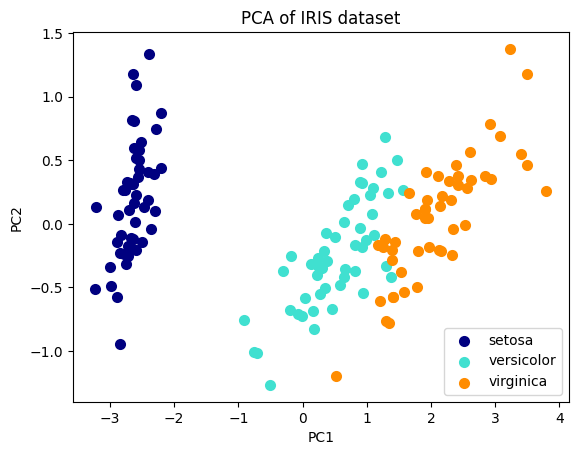

Explained variance ratio:
[0.92461872 0.05306648]


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame with the PCA-transformed data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

# Visualize the PCA-transformed data
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
target_names = iris.target_names

for color, target_name, target in zip(colors, target_names, [0, 1, 2]):
    plt.scatter(df_pca[df_pca['target'] == target]['PC1'], df_pca[df_pca['target'] == target]['PC2'], 
                color=color, lw=2, label=target_name)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

# Display explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:")
print(explained_variance_ratio)



## t-Distributed Stochastic Neighbor Embedding (t-SNE)d

## Theory:

t-SNE is a nonlinear dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data in 2D or 3D. It works by minimizing the divergence between two probability distributions: one that measures pairwise similarities in the high-dimensional space and another that measures pairwise similarities in the low-dimensional space.

t-SNE can be very effective at capturing complex, nonlinear relationships in the data. However, it is computationally expensive and not guaranteed to converge to a global optimum.

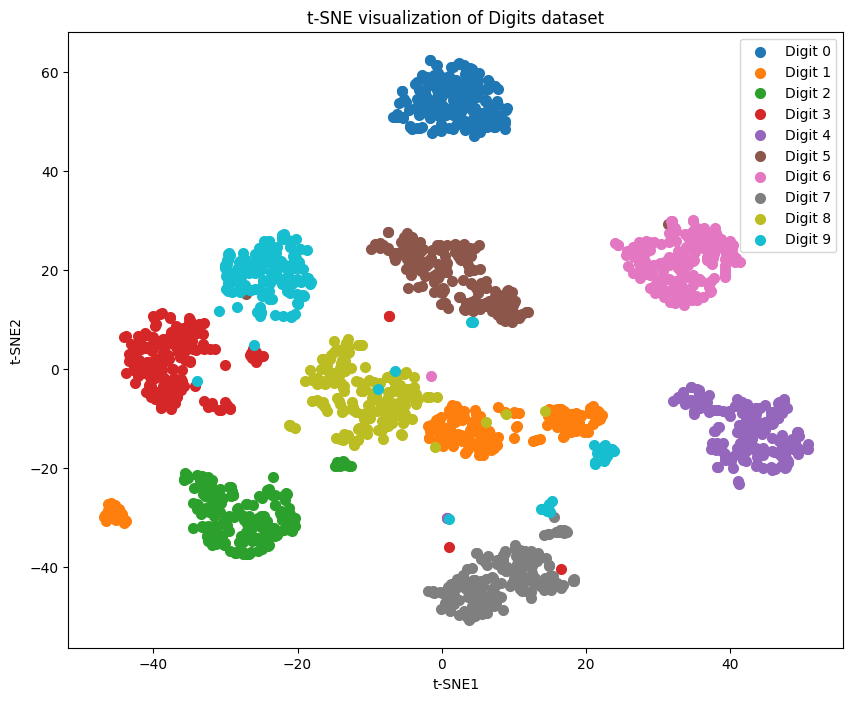

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Create a t-SNE object with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['target'] = y

# Visualize the t-SNE-transformed data
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for target, color in zip(range(10), colors):
    plt.scatter(df_tsne[df_tsne['target'] == target]['t-SNE1'], df_tsne[df_tsne['target'] == target]['t-SNE2'], 
                color=color, lw=2, label=f'Digit {target}')

plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('t-SNE visualization of Digits dataset')
plt.show()
